## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm



df = pd.read_csv("bikeshare.csv")
del df['datetime']

In [2]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

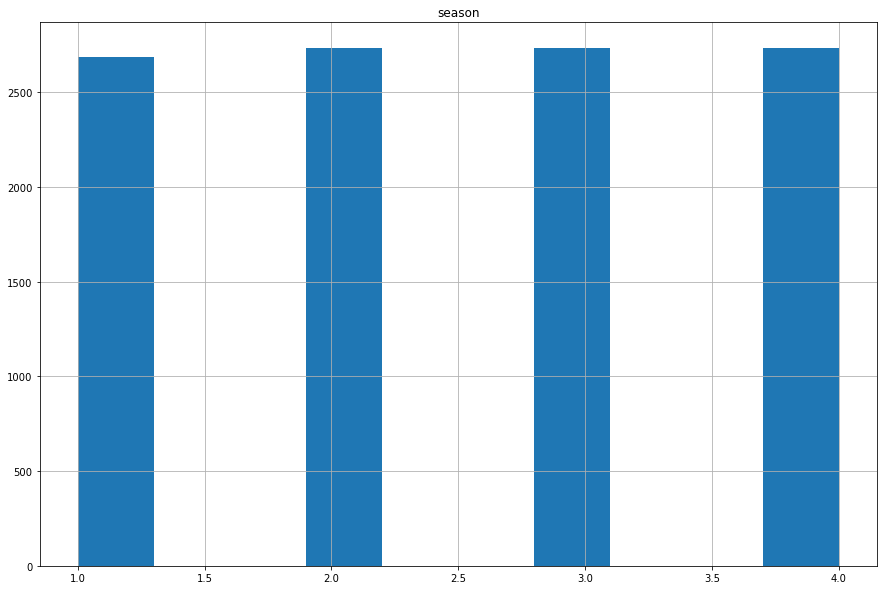

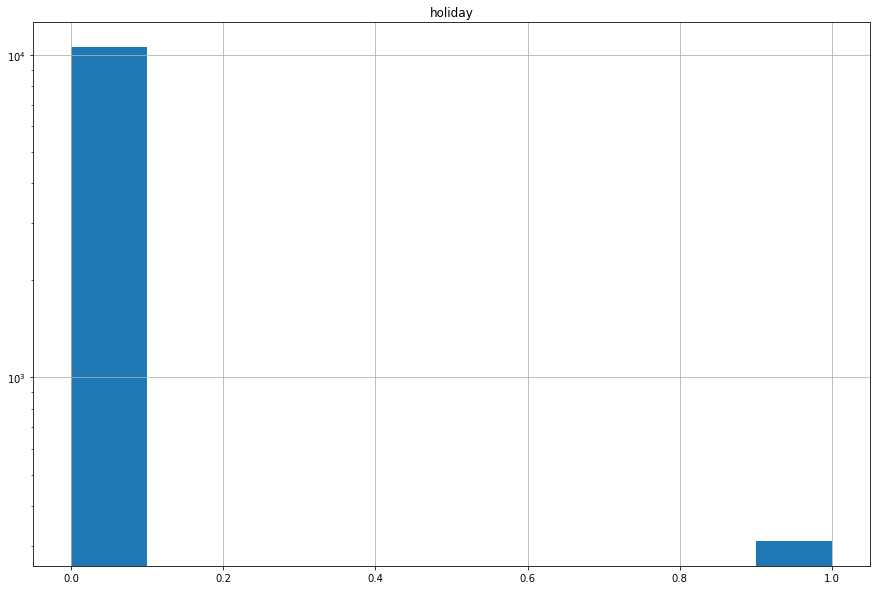

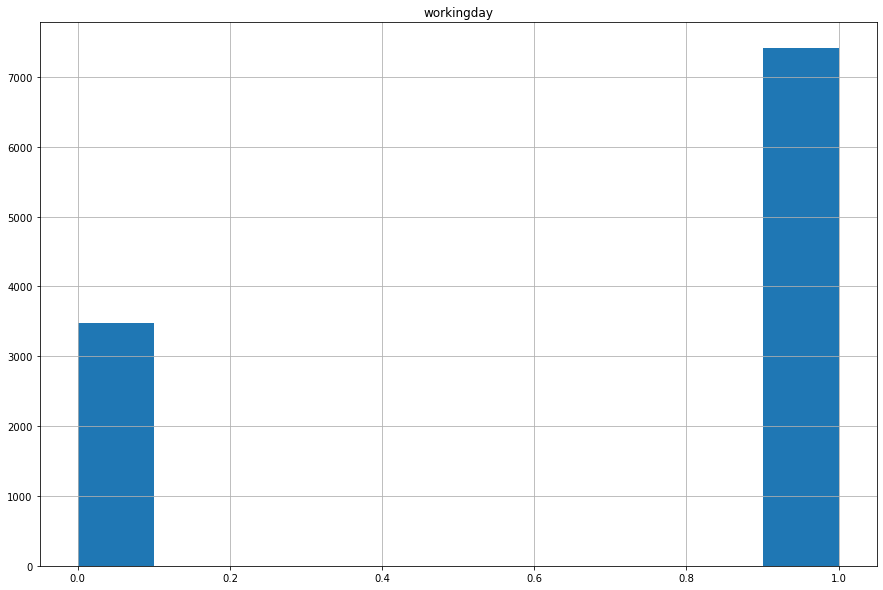

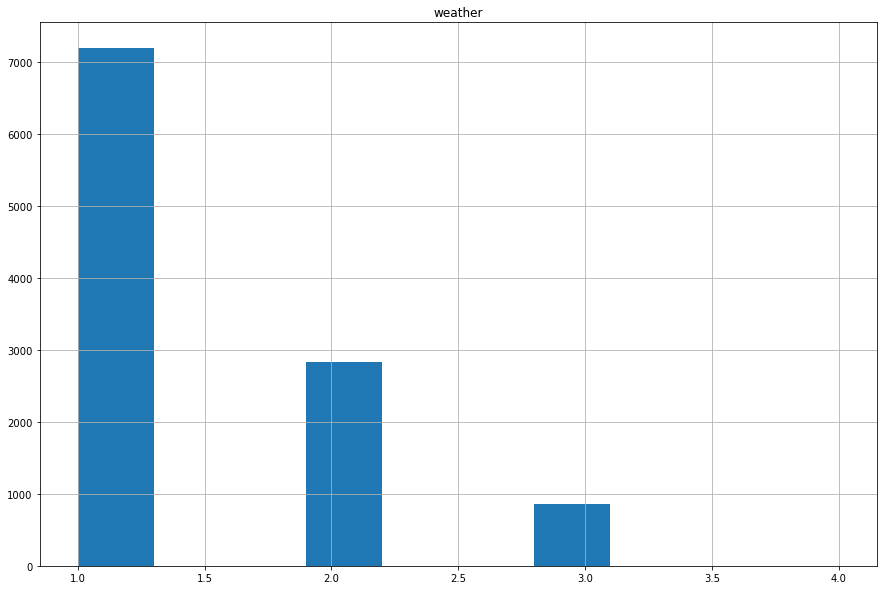

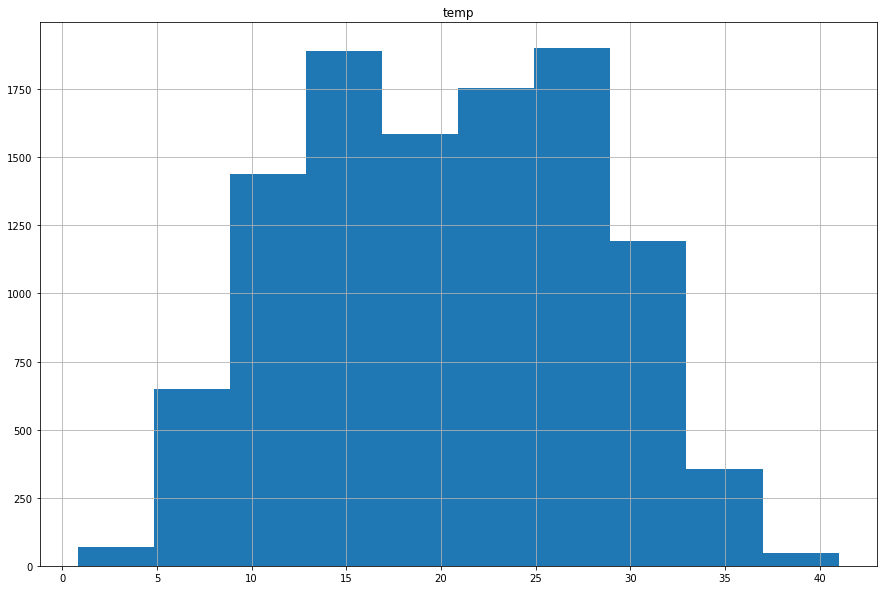

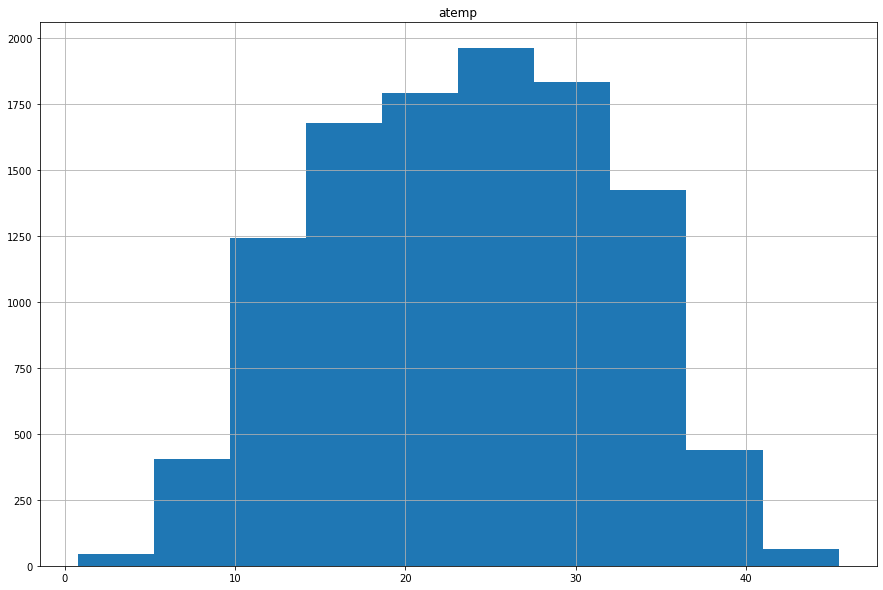

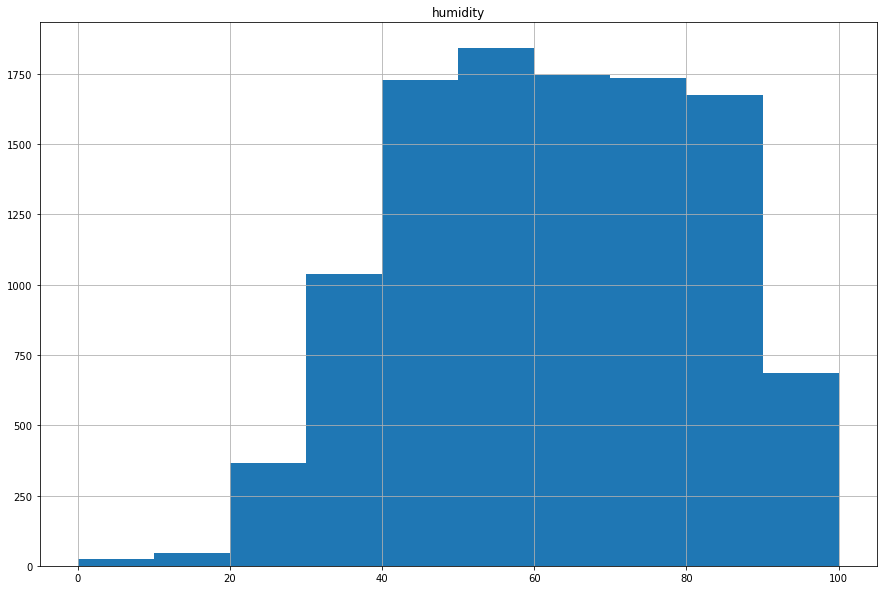

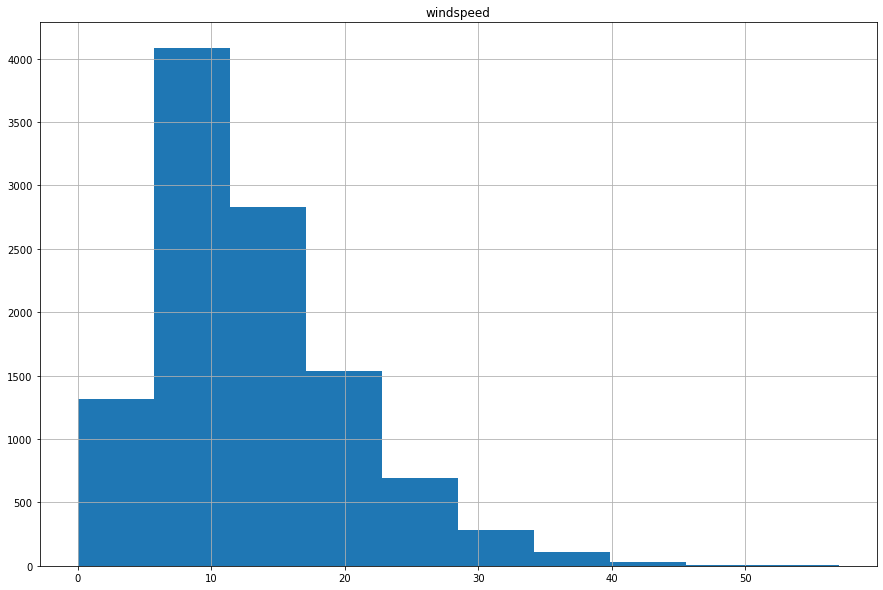

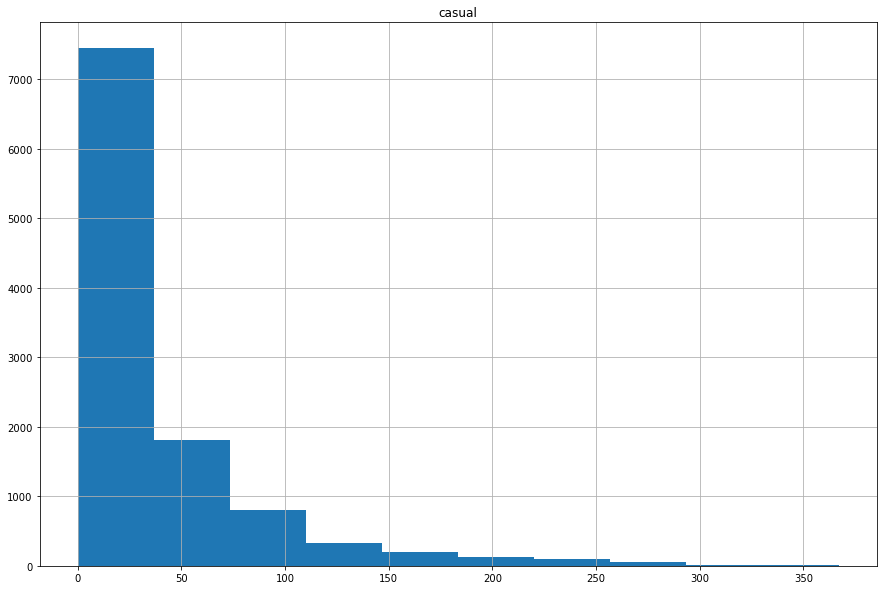

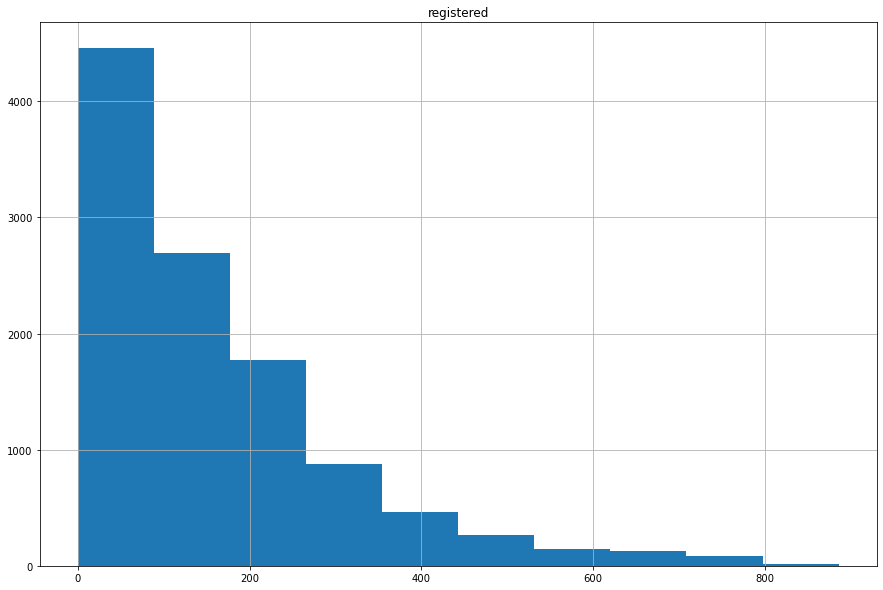

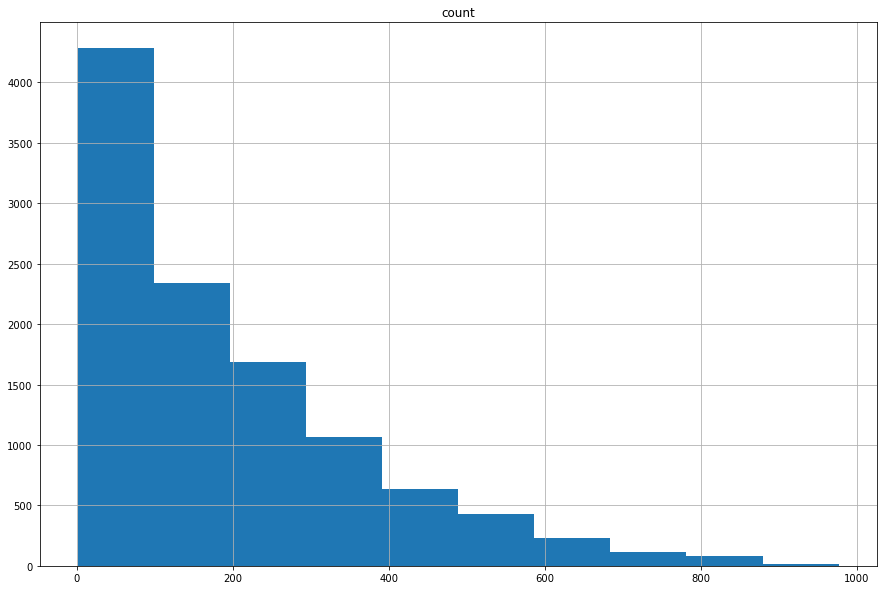

In [3]:
### YOUR CODE HERE ###

for elem in df.columns:
    fig, ax = plt.subplots(figsize=(15, 10))
    df[elem].hist()
    if elem == 'holiday':
        plt.yscale('log')
        
    plt.title(elem)
    
plt.show()

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [9]:
### YOUR CODE HERE ###

def my_basic_research(df, column):
    print('Среднее:')
    print(df[column].mean())
    print("------------------------------------")
    
    print('Дисперсия:')
    print(np.var(df[column]))
    print("------------------------------------")
    
    print('50 процентиль:')
    print(np.percentile(df[column], 50))
    print("------------------------------------")
    
    print('75 процентиль:')
    print(np.percentile(df[column], 75))
    print("------------------------------------")
    
    print('99 процентиль:')
    print(np.percentile(df[column], 99))
    print("------------------------------------")
    
    print('Мода:')
    print(df[column].value_counts().nlargest(10))
    print()

for column in df.columns:
    print(column)
    my_basic_research(df, column)


season
Среднее:
2.5066139996325556
------------------------------------
Дисперсия:
1.2457306441323706
------------------------------------
50 процентиль:
3.0
------------------------------------
75 процентиль:
4.0
------------------------------------
99 процентиль:
4.0
------------------------------------
Мода:
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

holiday
Среднее:
0.02856880396839978
------------------------------------
Дисперсия:
0.027752627408218353
------------------------------------
50 процентиль:
0.0
------------------------------------
75 процентиль:
0.0
------------------------------------
99 процентиль:
1.0
------------------------------------
Мода:
0    10575
1      311
Name: holiday, dtype: int64

workingday
Среднее:
0.6808745177291935
------------------------------------
Дисперсия:
0.21728440883623767
------------------------------------
50 процентиль:
1.0
------------------------------------
75 процентиль:
1.0
--------------------------------

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [8]:
### YOUR CODE HERE ###

def kurtosis_and_skew(df, column):
    print('Эксцесс:')
    print(kurtosis(df[column]))
    print("------------------------------------")
    
    print('Ассиметрия:')
    print(skew(df[column]))
    print()

for column in df.columns:
    print(column)
    kurtosis_and_skew(df, column)

season
Эксцесс:
-1.3555899543299803
------------------------------------
Ассиметрия:
-0.007074695296526289

holiday
Эксцесс:
30.032624417535125
------------------------------------
Ассиметрия:
5.6597371332540805

workingday
Эксцесс:
-1.3977369782030475
------------------------------------
Ассиметрия:
-0.7760560687198784

weather
Эксцесс:
0.39480007841067577
------------------------------------
Ассиметрия:
1.2433126730817885

temp
Эксцесс:
-0.9146613849825282
------------------------------------
Ассиметрия:
0.0036903358354289715

atemp
Эксцесс:
-0.8502363689497141
------------------------------------
Ассиметрия:
-0.10254538108264065

humidity
Эксцесс:
-0.760019710012902
------------------------------------
Ассиметрия:
-0.0863232869219358

windspeed
Эксцесс:
0.629292367034056
------------------------------------
Ассиметрия:
0.5886853963635482

casual
Эксцесс:
7.547610130561701
------------------------------------
Ассиметрия:
2.495404491505502

registered
Эксцесс:
2.6243238654959855
-----

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

Метрика с самой высокой дисперсией:  count 32810.29888623418
Базовые метрики
count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
5    169
4    149
3    144
6    135
2    132
Name: count, dtype: int64
------------------------------------
Эксцесс  1.2989447727380323
Ассиметрия  1.241895058803035

(-163.46247359398893, 546.6107374190854)


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Доверительный интервал')

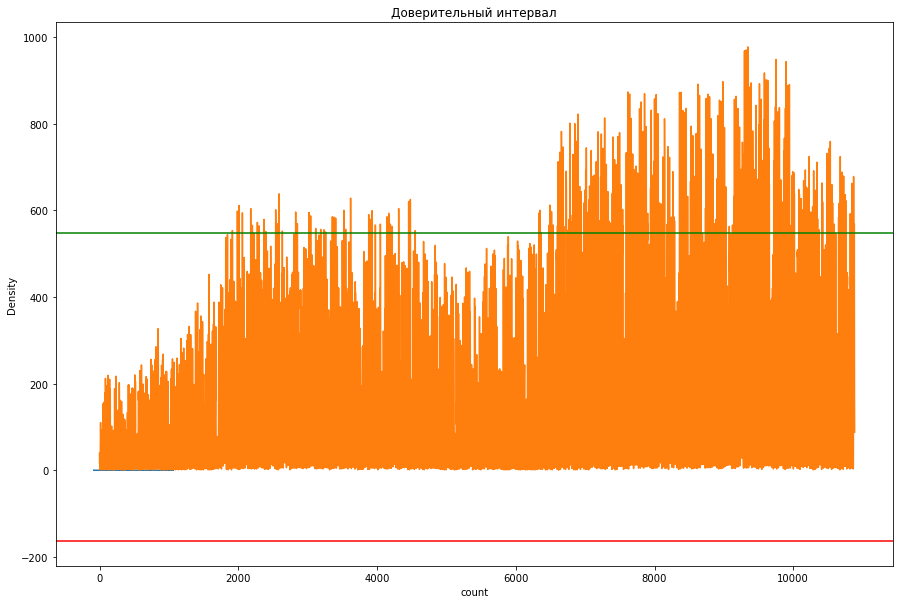

In [34]:
### YOUR CODE HERE ###

fig, ax = plt.subplots(figsize=(15, 10))

# Нахождение метрики с самой высокой дисперсией

i = 0
    
for column in df.columns:
    j = np.var(df[column])
    if j > i:
        columns = column
        i = j

print('Метрика с самой высокой дисперсией: ', columns, i)

# Как мы можем видеть, это метрика под названием count

# Проверка на распределение по Гауссову закону

def my_basic_research(df=df, column = "diff_price"):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    print()
    
    sns.distplot(df[column])
    plt.title("Распределение метрики")

my_basic_research(column = 'count')

# Как мы можем видеть, данная метрика не распределена по Гауссову закону, ибо не имеет формы колокола
# В данном случае, мы знаем что у нас много данных, поэтому мы можем построить доверительный интервал

def my_norm_confidence(df=df, column = 'count', alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

confidence = my_norm_confidence()
print(confidence)

df['count'].plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [3]:
### YOUR CODE HERE ###

def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    lower_level = df[column].mean() - 3*df[column].std()
    anomaly = df[(df[column] >= upper_level)^(df[column] <= lower_level)]
    return anomaly, upper_level, lower_level


for column in df.columns:
    anomaly, _, _ = find_anomaly(df=df, column = column)
    print(column, anomaly.shape[0])
    
#  Больше всего аномалий в метрике holiday

season 0
holiday 311
workingday 0
weather 1
temp 0
atemp 0
humidity 22
windspeed 67
casual 292
registered 235
count 147


### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

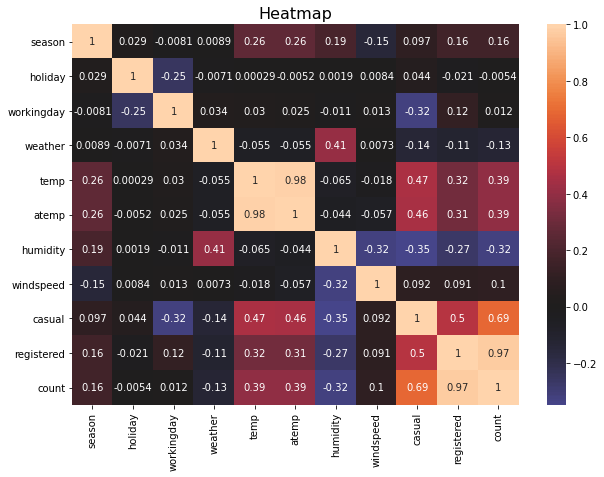

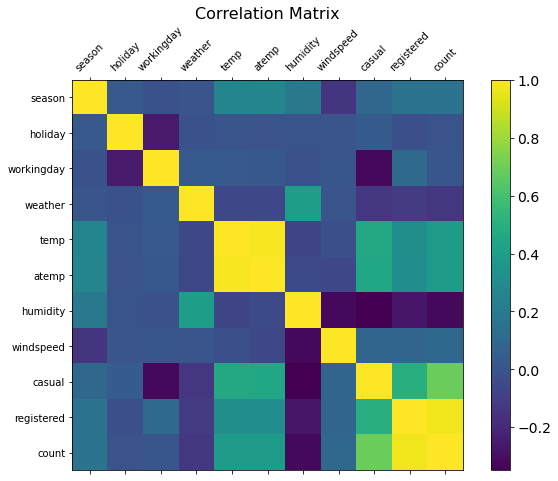

In [21]:
### YOUR CODE HERE ###

research_list = []
for column in df.columns:
    research_list.append(column)
    
df_corr = df[research_list].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(df_corr, center=0, annot=True)
plt.title('Heatmap', fontsize=16)

f = plt.figure(figsize=(10, 7))
plt.matshow(df_corr, fignum=f.number)

plt.xticks(range(df.shape[1]), df.columns, rotation=45)
plt.yticks(range(df.shape[1]), df.columns)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.show()

# Мы можем наблюдать самые сильные связи между count и registered, и attemp и temp, дальше уже начинаются 
# менее сильные свзяи, как у casual и count